In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,NaN,3.0,2.0,7.0,8.0,2.0,NaN,11.0,7.0,7.0,NaN,8.0,5.0,6.0,NaN
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,NaN,7.0,9.0,2.0,NaN,7.0,10.0,NaN
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,NaN,11.0,2.0,8.0,NaN,5.0,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,NaN,7.0,6.0,8.0,3.0,NaN,0.0,NaN,NaN
4,NaN,7.0,NaN,5.0,4.0,7.0,NaN,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,NaN,3.0,NaN,NaN,NaN,NaN,12.0,10.0,NaN,2.0,9.0,2.0,6.0,NaN
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,2.0,10.0,12.0,6.0,8.0,1.0,9.0,NaN,8.0,NaN
19997,4.0,8.0,4.0,NaN,4.0,7.0,NaN,7.0,4.0,10.0,7.0,NaN,3.0,NaN,NaN,7.0,NaN
19998,4.0,11.0,4.0,8.0,3.0,NaN,NaN,4.0,6.0,1.0,NaN,7.0,0.0,NaN,0.0,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4000
float64		column 2	3000
float64		column 3	4500
float64		column 4	3500
float64		column 5	5000
float64		column 6	3500
float64		column 7	5500
float64		column 8	3500
float64		column 9	5000
float64		column 10	3500
float64		column 11	1500
float64		column 12	5000
float64		column 13	6000
float64		column 14	3000
float64		column 15	4000
float64		column 16	3500
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,16000.000000,17000.000000,15500.000000,16500.000000,15000.000000,16500.000000,14500.000000,16500.000000,15000.000000,16500.000000,18500.000000,15000.000000,14000.000000,17000.000000,16000.000000,16500.000000,0.0
mean,4.010438,7.056588,5.112194,5.384727,3.470667,6.900242,7.476000,4.586788,5.173533,8.253576,6.449459,7.942867,2.993929,8.330000,3.682562,7.810485,NaN
std,1.797507,3.195988,1.874229,2.172814,2.036488,1.906630,2.091246,2.545027,2.218892,2.396345,2.576488,1.841800,2.085988,1.489234,2.449014,1.519703,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,7.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,4.000000,8.000000,8.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

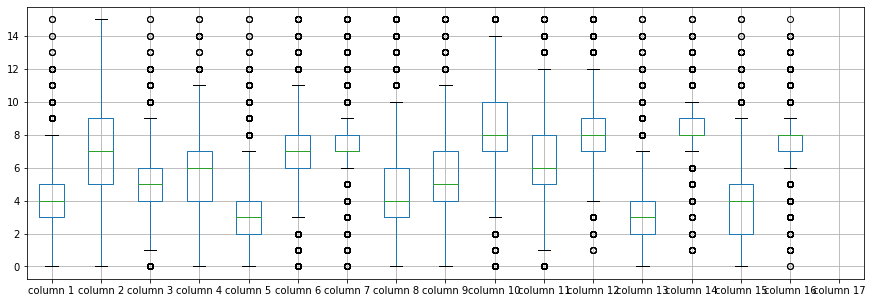

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.010438
column 2     7.056588
column 3     5.112194
column 4     5.384727
column 5     3.470667
column 6     6.900242
column 7     7.476000
column 8     4.586788
column 9     5.173533
column 10    8.253576
column 11    6.449459
column 12    7.942867
column 13    2.993929
column 14    8.330000
column 15    3.682562
column 16    7.810485
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.729761,0.821804,0.633950,0.582651,-0.033748,0.051920,0.014937,0.041805,0.140677,0.031644,-0.038897,0.441224,0.094573,0.246458,-0.110725,NaN
column 2,0.729761,1.000000,0.631301,0.810574,0.527249,0.041938,-0.016436,-0.024435,0.076083,0.156347,-0.052418,-0.003079,0.254774,0.010305,0.212919,-0.046232,NaN
column 3,0.821804,0.631301,1.000000,0.617387,0.735590,0.060429,0.028264,-0.086606,0.042394,0.101299,0.000678,-0.036340,0.515683,0.043708,0.232840,-0.109936,NaN
column 4,0.633950,0.810574,0.617387,1.000000,0.608430,0.035726,-0.013560,0.080155,0.051273,0.011153,-0.010904,0.021832,0.245355,0.020992,0.272556,-0.017286,NaN
column 5,0.582651,0.527249,0.735590,0.608430,1.000000,0.117155,-0.019926,-0.004292,-0.064080,-0.062217,-0.063659,-0.028733,0.578736,0.022929,0.429195,-0.062154,NaN
column 6,-0.033748,0.041938,0.060429,0.035726,0.117155,1.000000,-0.320610,-0.046298,-0.113127,0.065720,-0.316142,-0.028106,0.118282,-0.228453,0.120061,0.216588,NaN
column 7,0.051920,-0.016436,0.028264,-0.013560,-0.019926,-0.320610,1.000000,-0.098943,-0.055273,0.165519,0.569250,-0.217824,-0.034108,0.533836,-0.075729,-0.196859,NaN
column 8,0.014937,-0.024435,-0.086606,0.080155,-0.004292,-0.046298,-0.098943,1.000000,-0.166823,-0.305562,0.019580,0.072882,0.103517,-0.084782,0.042641,0.174947,NaN
column 9,0.041805,0.076083,0.042394,0.051273,-0.064080,-0.113127,-0.055273,-0.166823,1.000000,0.112010,-0.057929,0.094995,-0.325866,-0.052417,0.233598,-0.066941,NaN
column 10,0.140677,0.156347,0.101299,0.011153,-0.062217,0.065720,0.165519,-0.305562,0.112010,1.000000,0.043856,-0.090840,-0.168132,0.033001,-0.075346,-0.119241,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+8,17+8+8,17+8+8+8,17+8+8,17+8,17], vae_layer = False, seed = 80)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 59.89748257141113
Epoch: 1 , loss: 39.75544209747314
Epoch: 2 , loss: 36.61664107971191
Epoch: 3 , loss: 35.1506828201294
Epoch: 4 , loss: 34.428845388793945
Epoch: 5 , loss: 33.93916858673096
Epoch: 6 , loss: 33.50969614562988
Epoch: 7 , loss: 33.23404779052734
Epoch: 8 , loss: 32.934437744140624
Epoch: 9 , loss: 32.72138199615478
Epoch: 10 , loss: 32.51433253326416
Epoch: 11 , loss: 32.620039987182615
Epoch: 12 , loss: 32.28641647186279
Epoch: 13 , loss: 32.46175138397217
Epoch: 14 , loss: 32.12042421569824
Epoch: 15 , loss: 32.10421593017578
Epoch: 16 , loss: 32.06035208892822
Epoch: 17 , loss: 31.97691435546875
Epoch: 18 , loss: 32.01651490631104
Epoch: 19 , loss: 31.991229081726075
Epoch: 20 , loss: 31.85926279602051
Epoch: 21 , loss: 31.882135719299317
Epoch: 22 , loss: 31.81180712890625
Epoch: 23 , loss: 31.763153367614745
Epoch: 24 , loss: 31.89687240753174
Epoch: 25 , loss: 31.78796726989746
E

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    6.410429
column 15    0.000000
column 16    8.000000
column 17    0.005369
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.000000,0.0,1.237857,0.000000,0.000000,0.000000,0.000000,0.000000,-3.620982,0.00000,0.00000,0.000000,2.008710,0.000000,0.000000,0.000000,NaN
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.47461,0.00000,0.000000,0.000000,0.616074,0.000000,0.000000,NaN
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.701922,0.00000,0.00000,0.000000,-0.139612,0.000000,0.000000,0.000000,NaN
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.533430,0.00000,0.00000,0.000000,0.000000,-0.637690,0.000000,-1.062521,NaN
4,-0.883867,0.0,-1.390120,0.000000,0.000000,0.000000,3.799937,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000,0.0,0.000000,-2.648084,0.000000,2.879835,-2.613368,-2.531316,-2.904242,0.00000,0.00000,-1.128042,0.000000,0.000000,0.000000,0.000000,NaN
19996,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,-3.229631,0.000000,NaN
19997,0.000000,0.0,0.000000,1.138690,0.000000,0.000000,1.761918,0.000000,0.000000,0.00000,0.00000,4.367836,0.000000,1.921536,1.833615,0.000000,NaN
19998,0.000000,0.0,0.000000,0.000000,0.000000,7.088780,5.613132,0.000000,0.000000,0.00000,6.56415,0.000000,0.000000,0.559322,0.000000,0.000000,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

763.3731127271125

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.20444848606729202

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3      6.008881
column 4      6.461273
column 5     11.000000
column 6     10.000000
column 7      8.739121
column 8      3.000000
column 9      6.017868
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17     0.002000
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.000000,4.0,5.237857,3.000000,2.000000,7.000000,8.000000,2.000000,5.379018,11.00000,7.00000,7.000000,3.008710,8.000000,5.000000,6.000000,0.001603
1,4.000000,7.0,5.000000,5.000000,5.000000,5.000000,9.000000,6.000000,4.000000,9.47461,7.00000,9.000000,2.000000,9.616074,7.000000,10.000000,-0.002636
2,7.000000,10.0,8.000000,7.000000,4.000000,8.000000,8.000000,5.000000,3.298078,11.00000,2.00000,8.000000,1.860388,5.000000,5.000000,10.000000,-0.000502
3,4.000000,9.0,5.000000,7.000000,4.000000,7.000000,7.000000,13.000000,4.533430,7.00000,6.00000,8.000000,3.000000,7.362310,0.000000,6.937479,0.001479
4,5.116133,7.0,6.609880,5.000000,4.000000,7.000000,9.799937,3.000000,7.000000,10.00000,7.00000,9.000000,3.000000,8.000000,3.000000,7.000000,-0.000564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.000000,10.0,5.000000,5.351916,3.000000,6.879835,7.386632,4.468684,5.095758,12.00000,10.00000,7.871958,2.000000,9.000000,2.000000,6.000000,-0.002125
19996,4.000000,7.0,6.000000,5.000000,3.000000,7.000000,8.000000,2.000000,10.000000,12.00000,6.00000,8.000000,1.000000,9.000000,2.770369,8.000000,0.003907
19997,4.000000,8.0,4.000000,7.138690,4.000000,7.000000,9.761918,7.000000,4.000000,10.00000,7.00000,10.367836,3.000000,10.921536,4.833615,7.000000,0.003369
19998,4.000000,11.0,4.000000,8.000000,3.000000,7.088780,7.613132,4.000000,6.000000,1.00000,6.56415,7.000000,0.000000,8.559322,0.000000,8.000000,0.001692


In [21]:
imputations[-1].to_excel("Letter_NE_20(imp).xlsx", index=False, header=False)